In [6]:
import numpy as np
import WIMpy.DMUtils as DMU
from numpy import pi
from scipy.integrate import quad, dblquad, trapz
import verne_analytic as VA
from verne_analytic import isoID
from skmonaco import mcquad
from timeit import default_timer as timer
from tqdm import tqdm

In [7]:
#Matplotlib ------------

import matplotlib as mpl
font = { 'size'   : 14}
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.minor.size'] = 2
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.size'] = 2
mpl.rcParams['ytick.minor.width'] = 1
mpl.rc('font', **font)

import matplotlib.pyplot as pl
#------------------------

In [8]:
VA.loadIsotopes()

VA.loadPhiInterp()


 Loading isotope data and density profiles...
10
 Need to carefully check the density profiles...


In [13]:
depth = 10.6
sigp = 1e-28
m0 = 1e5

In [14]:
VA.calcVinitial_full(200.0, np.pi,  depth=depth, sigma_p=sigp, m_x=m0, target="full")

array([ 510.36606586])

In [64]:
vf_list = np.logspace(np.log10(1e-3), np.log10(1000),50)
vi_list = 0.0*vf_list
for i in tqdm(range(50)):
    vi_list[i] = VA.calcVinitial_full(vf_list[i], np.pi,  depth=depth, sigma_p=sigp, m_x=m0, target="earth")

100%|██████████| 50/50 [00:04<00:00,  5.49it/s]


[ 2.09335214  1.83625751  1.83628087  1.83625067  1.83625403  1.83626474
  1.83626663  1.83626116  1.8362549   1.83625571  1.83625255  1.83624792
  1.83624473  1.83623685  1.83622618  1.83621433  1.83619823  1.83617658
  1.83614769  1.83610937  1.83605915  1.83599233  1.83590341  1.83577641
  1.83550109  1.83500071  1.83415165  1.83265182  1.82999109  1.82532193
  1.81719056  1.80318691  1.77922614  1.73908837  1.67400157  1.57368825
  1.43027117  1.24477329  1.03214909  0.81798837  0.62722078  0.4743103
  0.36199116  0.28622059  0.24152455  0.22338953  0.22495276  0.23130932
  0.13581324  0.05349551]


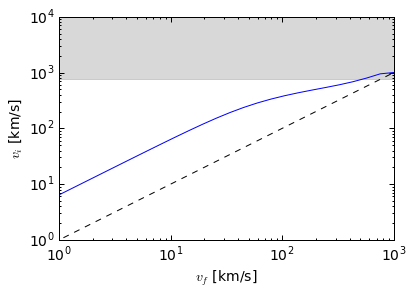

In [65]:
pl.figure()
pl.loglog(vf_list, vi_list)

pl.xlim(1, 1000)
pl.ylim(1, 10000)

pl.plot([1e-3,1e3], [1e-3, 1e3], 'k--')

pl.fill_between(vf_list,753.0,10000.0, color='gray', alpha=0.3)

pl.xlabel(r"$v_f$ [km/s]")
pl.ylabel(r"$v_i$ [km/s]")
pl.show()